# **Project - Drug annotation of 23andme report**

**Loading packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

**Loading in datasets for further analyses**

In [3]:
file_23 = pd.read_csv("23andme_v5_hg19_ref.txt", comment = "#", sep = "\t", header=None)
file_23

,0,1,2,3
0,chr1,69869,rs548049170,T
1,chr1,74792,rs13328684,G
2,chr1,565508,rs9283150,G
3,chr1,726912,i713426,A
4,chr1,727841,rs116587930,G
...,...,...,...,...
638458,chrM,16524,i4000693,A
638459,chrM,16524,i704756,A
638460,chrM,16525,i705255,A
638461,chrM,16526,i4000757,G


In [4]:
file_23.columns = ['CHR', 'POS', 'dbSNP_ID', 'ALLELE_23andme']

In [5]:
file_23

,CHR,POS,dbSNP_ID,ALLELE_23andme
0,chr1,69869,rs548049170,T
1,chr1,74792,rs13328684,G
2,chr1,565508,rs9283150,G
3,chr1,726912,i713426,A
4,chr1,727841,rs116587930,G
...,...,...,...,...
638458,chrM,16524,i4000693,A
638459,chrM,16524,i704756,A
638460,chrM,16525,i705255,A
638461,chrM,16526,i4000757,G


In [6]:
c = ['dbSNP_ID', 'ALLELE_23andme']
file_23_filtered = file_23[c]
file_23_filtered

,dbSNP_ID,ALLELE_23andme
0,rs548049170,T
1,rs13328684,G
2,rs9283150,G
3,i713426,A
4,rs116587930,G
...,...,...
638458,i4000693,A
638459,i704756,A
638460,i705255,A
638461,i4000757,G


In [9]:
cd '/Users/michael/Documents/Bioinformatics/Personal_Projects/23&me/23me_PharmGKB/variantAnnotations'

/Users/michael/Documents/Bioinformatics/Personal_Projects/23&me/23me_PharmGKB/variantAnnotations


In [10]:
var_drug = pd.read_csv("var_drug_ann.tsv", comment = "#", sep = "\t")
var_drug

,Variant Annotation ID,Variant/Haplotypes,Gene,Drug(s),PMID,Phenotype Category,Significance,Notes,Sentence,Alleles,...,isPlural,Is/Is Not associated,Direction of effect,PD/PK terms,Multiple drugs And/or,Population types,Population Phenotypes or diseases,Multiple phenotypes or diseases And/or,Comparison Allele(s) or Genotype(s),Comparison Metabolizer types
0,1451834452,"CYP3A4*1, CYP3A4*17",CYP3A4,nifedipine,15634941,"Other, Metabolism/PK",not stated,in vitro expression of the recombinant CYP3A4*...,CYP3A4 *17 is associated with decreased metabo...,*17,...,Is,Associated with,decreased,metabolism of,NaN,NaN,NaN,NaN,*1,NaN
1,1451159680,rs5031016,CYP2A6,warfarin,22248286,Dosage,no,No association was found between this variant ...,Allele G is not associated with increased dose...,G,...,Is,Not associated with,increased,dose of,NaN,in people with,Other:an international normalized ratio (INR) ...,NaN,A,NaN
2,1183684657,CYP2D6 ultrarapid metabolizer genotype,CYP2D6,tramadol,18204346,Metabolism/PK,yes,"Median (+)R,R-tramadol area under the curve wa...",CYP2D6 ultra-metabolizer genotype is associate...,NaN,...,Is,Associated with,increased,metabolism of,NaN,in healthy individuals,NaN,NaN,NaN,poor metabolizer genotype
3,1451306860,CYP2C9*11,CYP2C9,warfarin,33350885,Dosage,not stated,"""This case suggests that CYP2C9 *11/*11 carrie...",CYP2C9 *11/*11 is associated with decreased do...,*11/*11,...,Is,Associated with,decreased,dose of,NaN,NaN,NaN,NaN,NaN,NaN
4,1448997750,"CYP2B6*1, CYP2B6*18",CYP2B6,efavirenz,16495778,Metabolism/PK,yes,Please note that in the paper the allele was r...,CYP2B6 *1/*18 is associated with increased con...,*1/*18,...,Is,Associated with,increased,concentrations of,NaN,in people with,Disease:HIV Infections,NaN,*1/*1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11528,1452309700,rs2242480,CYP3A4,tacrolimus,38004558,Metabolism/PK,yes,"""CYP3A4*18B genotypes were also significant co...",Genotypes CT + TT is associated with increased...,CT + TT,...,Is,Associated with,increased,clearance of,NaN,in people with,Other:heart transplantation,NaN,CC,NaN
11529,1452311665,rs7590387,RAMP1,erenumab,34965002,Efficacy,no,"""RAMP1 rs7590387 was found to confer a lower p...",Allele G is associated with decreased clinical...,G,...,Is,Associated with,decreased,clinical benefit to,NaN,in people with,Other:Migraine NOS,NaN,C,NaN
11530,1452315160,rs17844444,PCDHB6,verapamil,33829662,Efficacy,yes,"""There are 3 highly significant SNPs (p‐value ...",Allele A is associated with decreased clinical...,A,...,Is,Associated with,decreased,clinical benefit to,NaN,in people with,Other:Migraine NOS,NaN,G,NaN
11531,1452311820,rs2230433,ITGAL,verapamil,33829662,Efficacy,yes,"""There are 3 highly significant SNPs (p‐value ...",Allele C is associated with increased clinical...,C,...,Is,Associated with,increased,clinical benefit to,NaN,in people with,Other:Migraine NOS,NaN,G,NaN


In [11]:
var_drug.columns

Index(['Variant Annotation ID', 'Variant/Haplotypes', 'Gene', 'Drug(s)',
       'PMID', 'Phenotype Category', 'Significance', 'Notes', 'Sentence',
       'Alleles', 'Specialty Population', 'Metabolizer types', 'isPlural',
       'Is/Is Not associated', 'Direction of effect', 'PD/PK terms',
       'Multiple drugs And/or', 'Population types',
       'Population Phenotypes or diseases',
       'Multiple phenotypes or diseases And/or',
       'Comparison Allele(s) or Genotype(s)', 'Comparison Metabolizer types'],
      dtype='object')

In [12]:
columns_of_interest = ['Variant/Haplotypes', 'Gene', 'Drug(s)',
       'PMID', 'Phenotype Category', 'Significance', 'Notes', 'Sentence',
       'Alleles']

var_drug_filtered = var_drug[columns_of_interest]
var_drug_filtered

,Variant/Haplotypes,Gene,Drug(s),PMID,Phenotype Category,Significance,Notes,Sentence,Alleles
0,"CYP3A4*1, CYP3A4*17",CYP3A4,nifedipine,15634941,"Other, Metabolism/PK",not stated,in vitro expression of the recombinant CYP3A4*...,CYP3A4 *17 is associated with decreased metabo...,*17
1,rs5031016,CYP2A6,warfarin,22248286,Dosage,no,No association was found between this variant ...,Allele G is not associated with increased dose...,G
2,CYP2D6 ultrarapid metabolizer genotype,CYP2D6,tramadol,18204346,Metabolism/PK,yes,"Median (+)R,R-tramadol area under the curve wa...",CYP2D6 ultra-metabolizer genotype is associate...,NaN
3,CYP2C9*11,CYP2C9,warfarin,33350885,Dosage,not stated,"""This case suggests that CYP2C9 *11/*11 carrie...",CYP2C9 *11/*11 is associated with decreased do...,*11/*11
4,"CYP2B6*1, CYP2B6*18",CYP2B6,efavirenz,16495778,Metabolism/PK,yes,Please note that in the paper the allele was r...,CYP2B6 *1/*18 is associated with increased con...,*1/*18
...,...,...,...,...,...,...,...,...,...
11528,rs2242480,CYP3A4,tacrolimus,38004558,Metabolism/PK,yes,"""CYP3A4*18B genotypes were also significant co...",Genotypes CT + TT is associated with increased...,CT + TT
11529,rs7590387,RAMP1,erenumab,34965002,Efficacy,no,"""RAMP1 rs7590387 was found to confer a lower p...",Allele G is associated with decreased clinical...,G
11530,rs17844444,PCDHB6,verapamil,33829662,Efficacy,yes,"""There are 3 highly significant SNPs (p‐value ...",Allele A is associated with decreased clinical...,A
11531,rs2230433,ITGAL,verapamil,33829662,Efficacy,yes,"""There are 3 highly significant SNPs (p‐value ...",Allele C is associated with increased clinical...,C


In [13]:
var_drug_filtered.columns = ["dbSNP_ID", "GENE_SYMBOL", "DRUG_NAME", "PMID", "PHENOTYPE_CATEGORY", "SIGNIFICANCE", "NOTES", "SENTENCE", "ALLELE_PharmGKB"]
var_drug_filtered

,dbSNP_ID,GENE_SYMBOL,DRUG_NAME,PMID,PHENOTYPE_CATEGORY,SIGNIFICANCE,NOTES,SENTENCE,ALLELE_PharmGKB
0,"CYP3A4*1, CYP3A4*17",CYP3A4,nifedipine,15634941,"Other, Metabolism/PK",not stated,in vitro expression of the recombinant CYP3A4*...,CYP3A4 *17 is associated with decreased metabo...,*17
1,rs5031016,CYP2A6,warfarin,22248286,Dosage,no,No association was found between this variant ...,Allele G is not associated with increased dose...,G
2,CYP2D6 ultrarapid metabolizer genotype,CYP2D6,tramadol,18204346,Metabolism/PK,yes,"Median (+)R,R-tramadol area under the curve wa...",CYP2D6 ultra-metabolizer genotype is associate...,NaN
3,CYP2C9*11,CYP2C9,warfarin,33350885,Dosage,not stated,"""This case suggests that CYP2C9 *11/*11 carrie...",CYP2C9 *11/*11 is associated with decreased do...,*11/*11
4,"CYP2B6*1, CYP2B6*18",CYP2B6,efavirenz,16495778,Metabolism/PK,yes,Please note that in the paper the allele was r...,CYP2B6 *1/*18 is associated with increased con...,*1/*18
...,...,...,...,...,...,...,...,...,...
11528,rs2242480,CYP3A4,tacrolimus,38004558,Metabolism/PK,yes,"""CYP3A4*18B genotypes were also significant co...",Genotypes CT + TT is associated with increased...,CT + TT
11529,rs7590387,RAMP1,erenumab,34965002,Efficacy,no,"""RAMP1 rs7590387 was found to confer a lower p...",Allele G is associated with decreased clinical...,G
11530,rs17844444,PCDHB6,verapamil,33829662,Efficacy,yes,"""There are 3 highly significant SNPs (p‐value ...",Allele A is associated with decreased clinical...,A
11531,rs2230433,ITGAL,verapamil,33829662,Efficacy,yes,"""There are 3 highly significant SNPs (p‐value ...",Allele C is associated with increased clinical...,C


**Merging both dataframes based on dbSNP_ID (also known as rsID)**

In [14]:
merged_df = pd.merge(var_drug_filtered, file_23_filtered, on='dbSNP_ID', how='inner')
merged_df

,dbSNP_ID,GENE_SYMBOL,DRUG_NAME,PMID,PHENOTYPE_CATEGORY,SIGNIFICANCE,NOTES,SENTENCE,ALLELE_PharmGKB,ALLELE_23andme
0,rs5031016,CYP2A6,warfarin,22248286,Dosage,no,No association was found between this variant ...,Allele G is not associated with increased dose...,G,A
1,rs5031016,CYP2A6,nicotine,11779172,Metabolism/PK,not stated,This SNP is in the CYP2A6*10 and *7 alleles ex...,Allele G is associated with decreased metaboli...,G,A
2,rs5031016,CYP2A6,nicotine,34476898,Metabolism/PK,not stated,Assigned as loss-of-function following in vitr...,Allele G is associated with decreased metaboli...,G,A
3,rs5031016,CYP2A6,nicotine,12445030,"Other, Metabolism/PK",no,This is a SNP within the CYP2A6*7 or *10 allel...,Allele G is associated with decreased metaboli...,G,A
4,rs7624046,KCNMB2,ritodrine,32371615,Efficacy,yes,variant-type homozygote carriers of rs7624046 ...,Genotype TT is associated with decreased respo...,TT,C
...,...,...,...,...,...,...,...,...,...,...
5623,rs36210737,CFTR,elexacaftor / tezacaftor / ivacaftor,37920361,Efficacy,no,"""We report 2 cases of pwCF with the rare M1101...",Genotype AA is associated with increased clini...,AA,T
5624,rs6431564,RAMP1,erenumab,36627267,Efficacy,yes,"""Additionally, the RAMP rs6431564G allele, whi...",Allele G is associated with increased clinical...,G,A
5625,rs12465864,RAMP1,erenumab,36627267,Efficacy,yes,"""Conversely, RAMP1 rs13386048A and RAMP1 rs124...",Allele G is associated with decreased clinical...,G,A
5626,rs6710852,CALCRL,erenumab,36627267,Efficacy,yes,"""After adjustments for clinical confounders, C...",Allele G is associated with increased clinical...,G,T


**Filtering output so that it only contains significant associations (SIGNIFICANCE is yes) for variants that affect the drug efficacy (`PHENOTYPE_CATEGORY` is `efficacy`)**

In [15]:
merged_fil = merged_df[(merged_df['SIGNIFICANCE'] == 'yes') & (merged_df['PHENOTYPE_CATEGORY'] == 'Efficacy')]
merged_fil

,dbSNP_ID,GENE_SYMBOL,DRUG_NAME,PMID,PHENOTYPE_CATEGORY,SIGNIFICANCE,NOTES,SENTENCE,ALLELE_PharmGKB,ALLELE_23andme
4,rs7624046,KCNMB2,ritodrine,32371615,Efficacy,yes,variant-type homozygote carriers of rs7624046 ...,Genotype TT is associated with decreased respo...,TT,C
10,rs1128503,ABCB1,fentanyl,22277678,Efficacy,yes,Please note that alleles have been complemente...,Genotype AA is associated with decreased respo...,AA,A
11,rs1128503,ABCB1,glucocorticoids,25346426,Efficacy,yes,The GG genotype was more frequent in patients ...,Genotype GG is associated with decreased respo...,GG,A
42,rs1128503,ABCB1,antipsychotics,22909202,Efficacy,yes,Please note: this variant deviated from Hardy-...,Allele G is associated with increased response...,G,A
45,rs1128503,ABCB1,tacrolimus,29615122,Efficacy,yes,Patients with the AA genotype had a higher eff...,Genotype AA is associated with increased respo...,AA,A
...,...,...,...,...,...,...,...,...,...,...
5622,rs661899,MGAT5,ursodeoxycholic acid,37845416,Efficacy,yes,"""Rs661899 was strongly related to response to ...",Genotype TT is associated with decreased clini...,TT,T
5624,rs6431564,RAMP1,erenumab,36627267,Efficacy,yes,"""Additionally, the RAMP rs6431564G allele, whi...",Allele G is associated with increased clinical...,G,A
5625,rs12465864,RAMP1,erenumab,36627267,Efficacy,yes,"""Conversely, RAMP1 rs13386048A and RAMP1 rs124...",Allele G is associated with decreased clinical...,G,A
5626,rs6710852,CALCRL,erenumab,36627267,Efficacy,yes,"""After adjustments for clinical confounders, C...",Allele G is associated with increased clinical...,G,T


In [16]:
final_columns_of_interest = ['dbSNP_ID', 'GENE_SYMBOL', 'DRUG_NAME', 'NOTES', 'SENTENCE', 'ALLELE_PharmGKB', 'ALLELE_23andme']

In [17]:
output_df = merged_fil[final_columns_of_interest]
output_df

,dbSNP_ID,GENE_SYMBOL,DRUG_NAME,NOTES,SENTENCE,ALLELE_PharmGKB,ALLELE_23andme
4,rs7624046,KCNMB2,ritodrine,variant-type homozygote carriers of rs7624046 ...,Genotype TT is associated with decreased respo...,TT,C
10,rs1128503,ABCB1,fentanyl,Please note that alleles have been complemente...,Genotype AA is associated with decreased respo...,AA,A
11,rs1128503,ABCB1,glucocorticoids,The GG genotype was more frequent in patients ...,Genotype GG is associated with decreased respo...,GG,A
42,rs1128503,ABCB1,antipsychotics,Please note: this variant deviated from Hardy-...,Allele G is associated with increased response...,G,A
45,rs1128503,ABCB1,tacrolimus,Patients with the AA genotype had a higher eff...,Genotype AA is associated with increased respo...,AA,A
...,...,...,...,...,...,...,...
5622,rs661899,MGAT5,ursodeoxycholic acid,"""Rs661899 was strongly related to response to ...",Genotype TT is associated with decreased clini...,TT,T
5624,rs6431564,RAMP1,erenumab,"""Additionally, the RAMP rs6431564G allele, whi...",Allele G is associated with increased clinical...,G,A
5625,rs12465864,RAMP1,erenumab,"""Conversely, RAMP1 rs13386048A and RAMP1 rs124...",Allele G is associated with decreased clinical...,G,A
5626,rs6710852,CALCRL,erenumab,"""After adjustments for clinical confounders, C...",Allele G is associated with increased clinical...,G,T


**Output to a tsv file**

In [37]:
output_df.to_csv('23andme_PharmGKB_map.tsv', sep='\t', index=False)

**Creating a tab separated file (23andme_PharmGKB_summary.tsv) with summarized data**

In [18]:
new_df = output_df.groupby(['GENE_SYMBOL', 'DRUG_NAME'])['dbSNP_ID'].apply(';'.join).reset_index()
new_df


,GENE_SYMBOL,DRUG_NAME,dbSNP_ID
0,ABCA1,"atorvastatin, rosuvastatin, simvastatin",rs2230806
1,ABCA1,fenofibrate,rs2230806;rs2230806;rs2230808
2,ABCB1,antipsychotics,rs1128503
3,ABCB1,clopidogrel,rs1128503
4,ABCB1,clozapine,rs7787082;rs10248420
...,...,...,...
819,XRCC3,"cisplatin, docetaxel, irinotecan",rs861539
820,XRCC4,"fluorouracil, Platinum compounds, radiotherapy",rs2075685
821,ZNF432,"budesonide, corticosteroids, fluticasone propi...",rs3752120
822,ZNF697,"interferon beta-1a, interferon beta-1b",rs10494227


In [44]:
new_df.to_csv('23andme_PharmGKB_summary.tsv)', sep='\t', index=False)

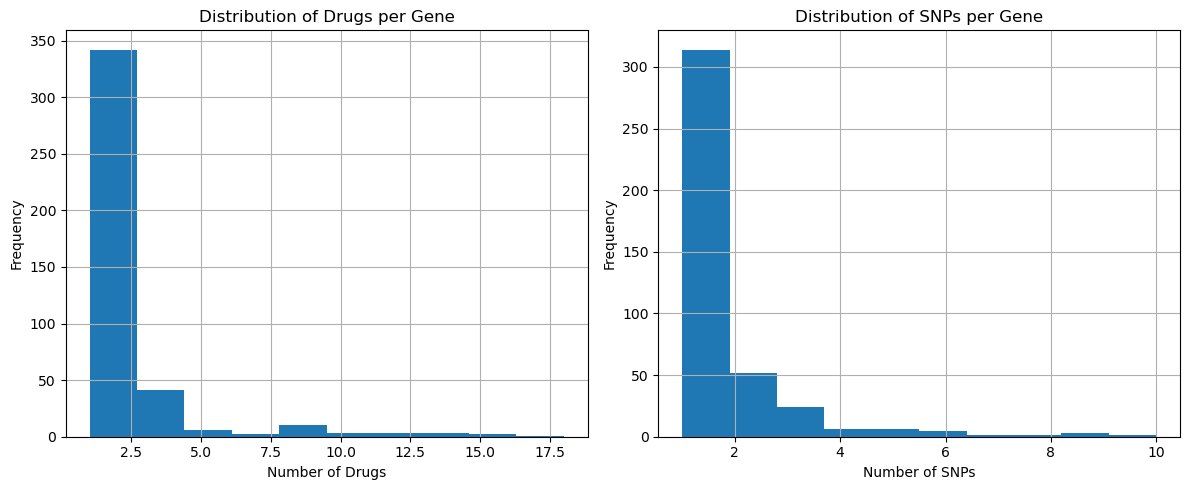

In [19]:
drugs_per_gene = new_df.groupby('GENE_SYMBOL')['DRUG_NAME'].nunique()
snps_per_gene = new_df.groupby('GENE_SYMBOL')['dbSNP_ID'].nunique()

#Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
drugs_per_gene.hist()
plt.title('Distribution of Drugs per Gene')
plt.xlabel('Number of Drugs')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
snps_per_gene.hist()
plt.title('Distribution of SNPs per Gene')
plt.xlabel('Number of SNPs')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **Drug-Gene Association network**

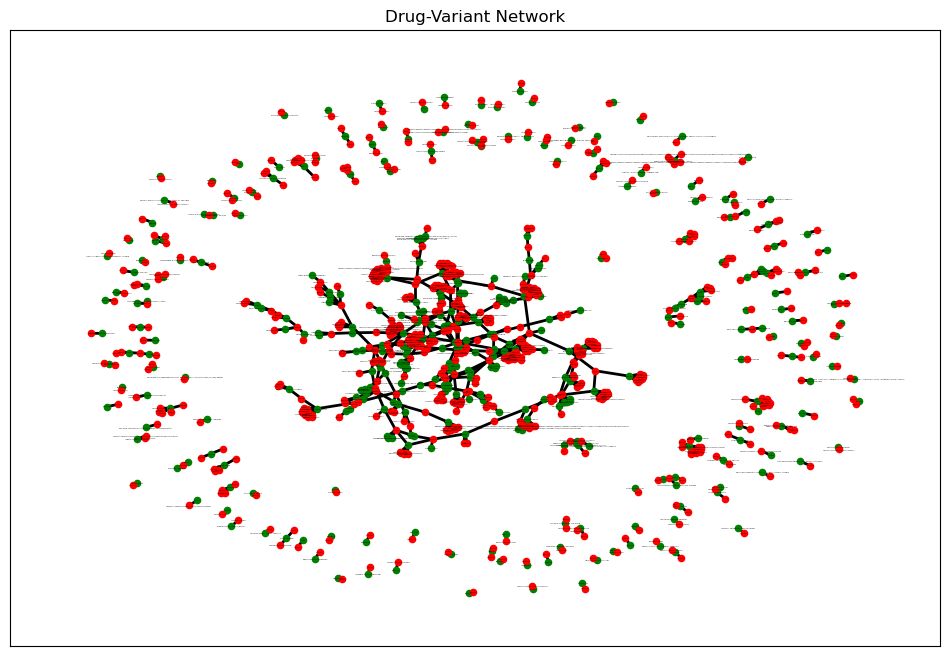

In [65]:
#Creation of the Graph for my Drug-Variant Association network in the dataframe where significance is yes and phenotype is efficacy 
G = nx.Graph()

# Add nodes and edges
for _, row in new_df.iterrows():
    G.add_node(row['DRUG_NAME'], type='drug')
    G.add_node(row['dbSNP_ID'], type='variant')
    G.add_edge(row['DRUG_NAME'], row['dbSNP_ID'])

#visualization
plt.figure(figsize=(12, 8))
position = nx.spring_layout(G)  # positions for all nodes

#Separation of the nodes by type
drug_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'drug']
variant_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'variant']

#Drawing nodes and edges where drugs are green and variants are red
nx.draw_networkx_nodes(G, position, nodelist=drug_nodes, node_color='green', node_size=20)
nx.draw_networkx_nodes(G, position, nodelist=variant_nodes, node_color='red', node_size=20)
nx.draw_networkx_edges(G, position, width=2)
nx.draw_networkx_labels(G, position, font_size=1)

plt.title("Drug-Variant Network")
plt.show()



# **Personalized Variant & Gene finder for a drug of interest**

In [62]:
def Personalized_variant_finder(Drug, df):
    """
    Parameters:
    Drug (str): The drug name to search for.
    df (pd.DataFrame): The DataFrame to search within.
    
    Returns:
    pd.DataFrame: A DataFrame of associated variants and what genes they are found on.
    """

    # Filtering the DataFrame for rows where the 'DRUG_NAME' column contains the specified drug in a case insensitive manner
    filtered_df = df[df['DRUG_NAME'].str.contains(Drug, case=False)]
    c = ['GENE_SYMBOL', 'dbSNP_ID']
    return filtered_df[c].reset_index(drop=True)

#Using our summary dataframe created above for finding Drug-associated variants and their genes
result_df = Personalized_variant_finder("clopidogrel", new_df)
print(result_df)



   GENE_SYMBOL                                           dbSNP_ID
0        ABCB1                                          rs1128503
1        ABCC2                                           rs717620
2         CES1                                         rs71647871
3      CYP2C19                      rs4244285;rs4244285;rs4244285
4      CYP2C19  rs4244285;rs4244285;rs4244285;rs4244285;rs4244...
5      CYP2C19                                          rs4244285
6       CYP3A5                                           rs776746
7       CYP4F2                                          rs2108622
8          KDR                                          rs2305948
9       P2RY12            rs2046934;rs6785930;rs6809699;rs6809699
10       PEAR1                                         rs12041331


In [63]:
result_df = Personalized_variant_finder("antipsychotics", new_df)
print(result_df)

   GENE_SYMBOL               dbSNP_ID
0        ABCB1              rs1128503
1         BDNF      rs6265;rs11030104
2      BDNF-AS             rs10501087
3     CACNA2D3              rs7427395
4       CACNB2               rs982003
5       CACNB4              rs3768652
6         CCL2       rs4586;rs4795893
7         DRD2    rs1799732;rs1799732
8         DRD3                 rs6280
9         GRM3    rs6465084;rs2299214
10       HTR1A             rs10042486
11       HTR2A              rs7997012
12       MTHFR              rs1801133
13       NRXN1  rs10490162;rs12467557
14       PI4KA               rs165854
15     ZNF804A              rs1344706
